<a href="https://colab.research.google.com/github/batbayar738/PolymorphicVirus/blob/master/TechLev_demo2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Demo 2: *Post*-processing Technical Leverage Python

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import csv
import collections

### Read Output.csv

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
vuln_techlev = dict()
max = 0
min = float('inf')

#with open('/content/drive/My Drive/Research/output.csv','r') as csvfile: 
with open('drive/My Drive/Colab Notebooks/output.csv', 'r') as csvfile: 
    rows = csv.reader(csvfile, delimiter=',')
    for row in rows:
      if row[0] == "pkg_name":
        continue

      val = float(row[4])
      if not row[7] in vuln_techlev:
        vuln_techlev[row[7]] = []
      vuln_techlev[row[7]].append(val)

      if val > max:
        max = val
      if val < min:
        min = val
vuln_techlev = collections.OrderedDict(sorted(vuln_techlev.items()))
vuln_techlev = dict(vuln_techlev)

#Create box plot


In [ ]:
avg = (max + min)/2

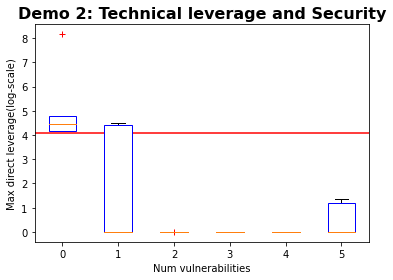

In [ ]:
keys, values = vuln_techlev.keys(), vuln_techlev.values()

bp = plt.boxplot(np.array(list(values), dtype="object"), 0, sym="r+", patch_artist=True)
plt.xticks(range(1, len(keys) + 1), keys)
plt.axhline(avg, c='r')
plt.title('Demo 2: Technical leverage and Security', fontweight='bold', fontsize='16')
plt.ylabel('Max direct leverage(log-scale)')
plt.xlabel('Num vulnerabilities')

for box in bp['boxes']:
    box.set(edgecolor='blue', linewidth=1)
    box.set(facecolor = 'white' )
plt.show()